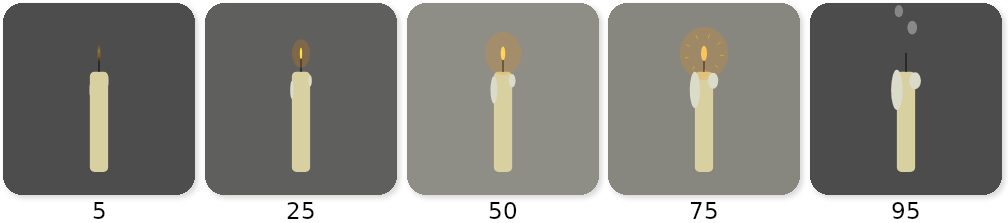

interactive(children=(FloatSlider(value=50.0, description='x'), Output()), _dom_classes=('widget-interact',))

In [38]:
import mglyph as mg
import numpy as np
import random

""" My glyph library """

def empty_glyph(x: float, canvas: mg.Canvas) -> None:
    pass


def hatching_chick(x: float, canvas: mg.Canvas) -> None:
    pass

def candle_glyph(x: float, canvas: mg.Canvas) -> None:
    # svicka
    bg_color = mg.ColorMap({0: "#4C4C4C", 100: "#D0D0BF"})

    bgx = x
    if x > 70:
        t = (x - 70) / 15 * 100
        bgx = mg.lerp(t, 70.0, 0.0)

    canvas.circle((0, 0), 5, style='fill', color=bg_color.get_color(bgx))

    canvas.rounded_rect((-0.1, -0.3), (0.1, 0.8), 0.05, 0.05, 0.05, 0.05, style='fill', color="#D8D0A0")

    # knot
    canvas.line((0, -0.5), (0, -0.3), width='10p', color='black', linecap='round')
    
    # plamen, bude menit velikost a barvu, bude mit dve casti - vnitrni a vnejsi, vnejsi se objevi pozdeji
    if x <= 70: # plamen se zvetsuje
        f = mg.lerp(x, 0.0, 100.0)
    elif x <= 85: # plamen se zmensuje
        t = (x - 70) / 15 * 100
        f = mg.lerp(t, 100.0, 0.0)
    else: # plamen neni
        f = 0.0

    #vnitrni plamen
    canvas.ellipse((0, -0.5), mg.lerp(f, 0.0, 0.1), mg.lerp(f, 0.1, 0.2), style='fill', color=mg.ColorMap({0: "#FFFF47", 70: "#FFE07A", 85: "#E3AD70"}).get_color(x))
    #vnejsi plamen
    canvas.ellipse((0, -0.5), mg.lerp(f, 0.0, 0.8), mg.lerp(f, 0.15, 0.8), style='fill', color=(1, 0.55, 0, 0.2))
    
    wax_x = x
    if wax_x > 85:
        wax_x = 85

    canvas.ellipse((0.1, -0.2), mg.lerp(wax_x, 0.0, 0.15), mg.lerp(wax_x, 0.1, 0.2), style='fill', color="#DBDBCA")
    canvas.ellipse((-0.1, -0.1), mg.lerp(wax_x, 0.0, 0.15), mg.lerp(wax_x, 0.1, 0.5), style='fill', color="#DBDBCA")
    
    if x >= 85:
        s = (x - 85) / 15 * 100 
        if s > 100:
            s = 100

        y0 = mg.lerp(s, -0.45, -0.95)

        a = mg.lerp(s, 0.10, 0.60)

        wobble = 0.05 * np.sin(x * 0.35)

        c1 = (0.85, 0.85, 0.85, a)
        c2 = (0.90, 0.90, 0.90, a * 0.85)
        c3 = (0.95, 0.95, 0.95, a * 0.70)

        canvas.ellipse((0.02 + wobble, y0), mg.lerp(s, 0.04, 0.14), mg.lerp(s, 0.05, 0.20), style='fill', color=c1)

        canvas.ellipse((-0.04 - wobble * 0.8, y0 - 0.18), mg.lerp(s, 0.035, 0.12), mg.lerp(s, 0.045, 0.18), style='fill', color=c2)

        canvas.ellipse((0.03 + wobble * 0.6, y0 - 0.34), mg.lerp(s, 0.03, 0.10), mg.lerp(s, 0.04, 0.15), style='fill', color=c3)

    # paprsky u plaminku
    if f > 60:
        b = (f - 60) / 40
        if b > 1:
            b = 1

        n_rays = int(8 + 10 * b)         
        r0 = 0.18                         
        r1 = 0.18 + 0.20 * b              
        ray_w = f"{int(4 + 10 * b)}p"     

        phase = x * 0.08

        for i in range(n_rays):
            ang = phase + i * 2*np.pi / n_rays
            p0 = mg.orbit((0, -0.5), ang, r0)
            p1 = mg.orbit((0, -0.5), ang, r1)
            canvas.line(p0, p1, width=ray_w, color='gold', linecap='round')


mg.show(candle_glyph, scale=2)
mg.interact(candle_glyph)



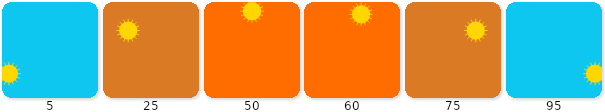

In [10]:
# author: Peter Ďurica
def sun_graph(x: float, canvas: mg.Canvas) -> None:
    cm = mg.ColorMap({0: (0, 0.8, 1), 
                      100/3: (1, 0.423, 0), 
                      200/3: (1, 0.423, 0), 
                      100: (0, 0.8, 1)})
    
    canvas.circle((0, 0), 5, style='fill', color=cm.get_color(x))
    sun_x = mg.lerp(x, canvas.xleft, canvas.xright)
    sun_y = (sun_x * 1.3)**2 - 0.85
    canvas.circle((sun_x, sun_y), 0.2, style='fill', color='gold')
    for ray in range(16):
        canvas.line((sun_x, sun_y), 
                    mg.orbit((sun_x, sun_y), ray * 2*np.pi/16, 0.25), 
                    width='20p', color='gold')

mg.show(sun_graph, x=[5, 25, 50, 60, 75, 95])

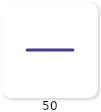

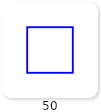

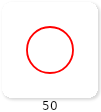

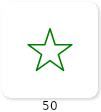

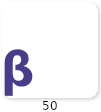

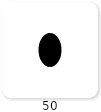

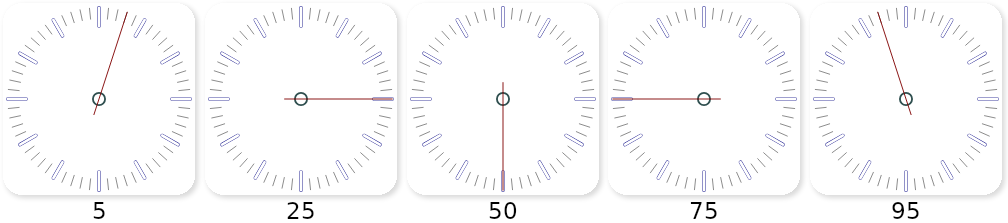

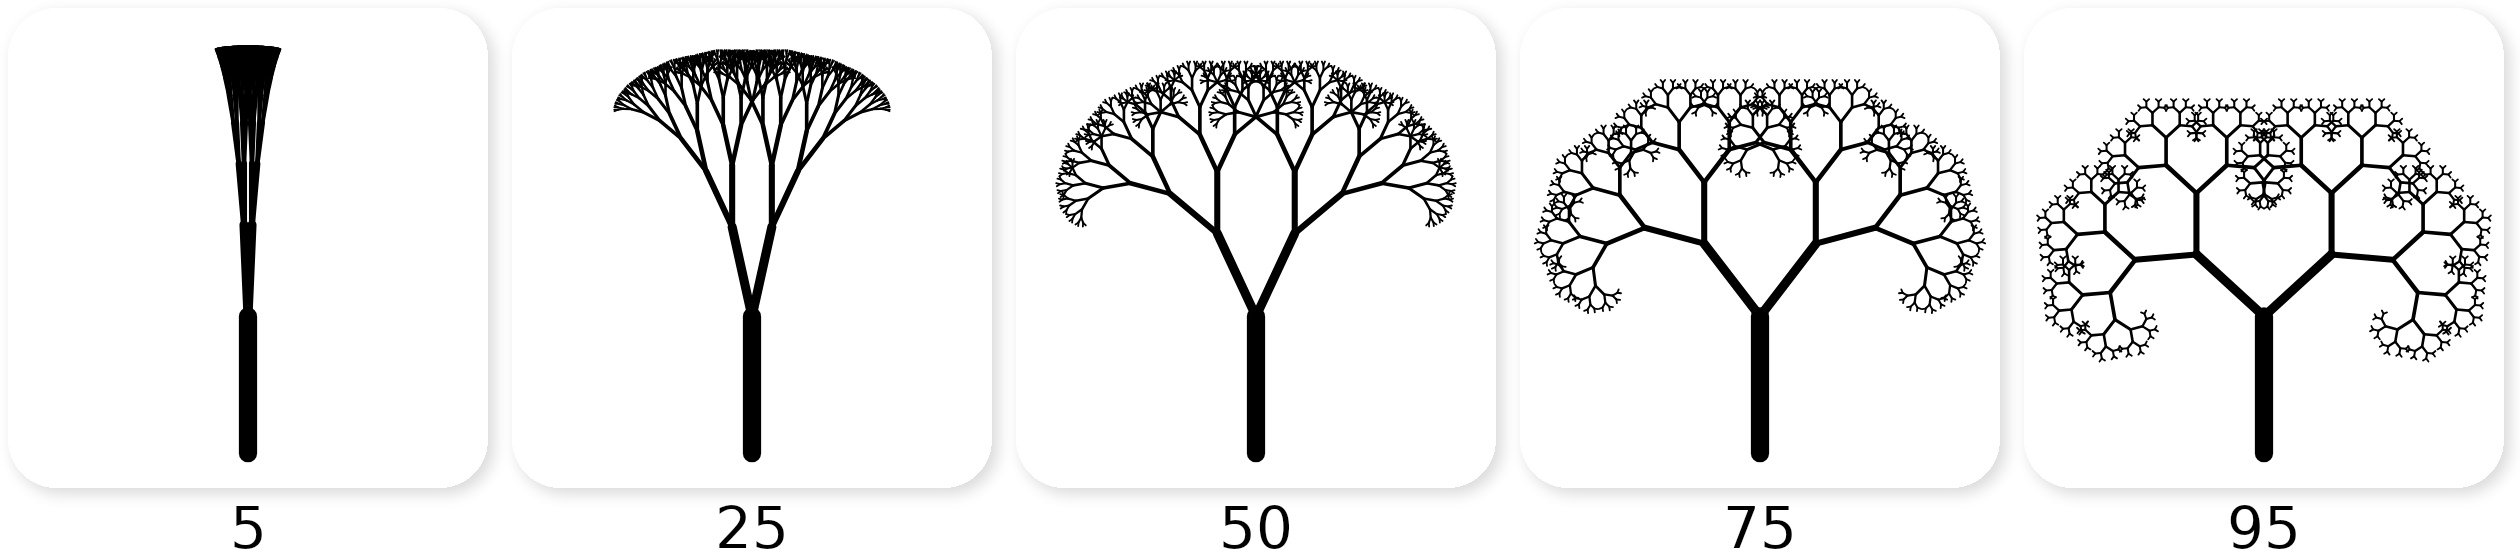

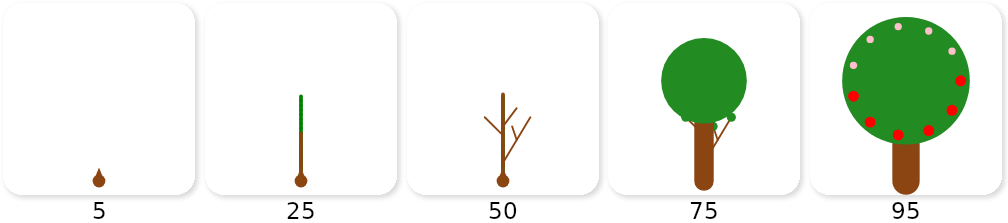

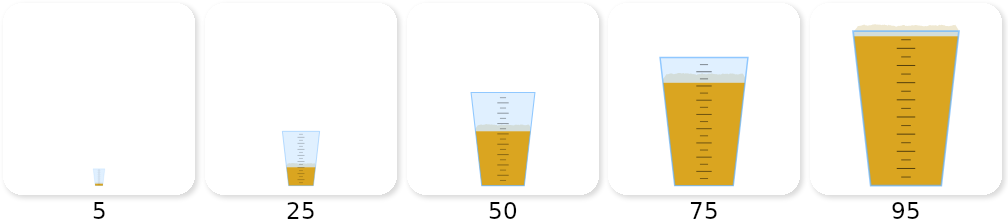

In [40]:
def simple_horizontal_line(x: float, canvas: mg.Canvas) -> None:
    canvas.line((mg.lerp(x, canvas.xcenter, canvas.xleft), canvas.ycenter),    # line start
                (mg.lerp(x, canvas.xcenter, canvas.xright), canvas.ycenter),   # line end
                width='70p', linecap='round', color='darkslateblue')
    
mg.show(simple_horizontal_line, x=[50])


def simple_scaled_square(x: float, canvas: mg.Canvas) -> None:
    tl = (mg.lerp(x, 0.0, -1), mg.lerp(x, 0.0, -1.0))
    br = (mg.lerp(x, 0, 1), mg.lerp(x, 0, 1))
    canvas.rect(tl, br, color='blue', style='stroke', width='40p')

mg.show(simple_scaled_square,x=[50])


def simple_scaled_circle(x: float, canvas: mg.Canvas) -> None:
    canvas.circle(canvas.center, mg.lerp(x, 0.01, canvas.ysize/2), color='red', style='stroke', width='40p')

mg.show(simple_scaled_circle, x=[50])

def simple_scaled_star(x: float, canvas: mg.Canvas) -> None:
    center = (0, mg.lerp(x, 0, 0.08))
    radius = mg.lerp(x, 0.01, canvas.ysize/2)
    vertices = []
    for segment in range(5):
        vertices.append(mg.orbit(center, segment * 2*np.pi/5, radius))
        vertices.append(mg.orbit(center, (segment + 0.5) * 2*np.pi/5, np.cos(2*np.pi/5)/np.cos(np.pi/5) * radius))
    canvas.polygon(vertices, color='green', closed=True, style='stroke', width='35p', linejoin='round')

mg.show(simple_scaled_star, x=[50])

def scaled_letter_left_bottom(x: float, canvas: mg.Canvas) -> None:
    canvas.text('β', (-1,1), 'Arial', mg.lerp(x, 0.05, 2.0), 
                anchor='bl', color='darkslateblue', font_weight='bold', font_slant='upright')
    
mg.show(scaled_letter_left_bottom, x=[50])


def simple_scaled_ellipse(x: float, canvas: mg.Canvas) -> None:
    canvas.ellipse(canvas.center, mg.lerp(x, 0.01, 1), mg.lerp(x, 0.5, 1))

mg.show(simple_scaled_ellipse, x=[50])


def one_handed_clock(x: float, canvas: mg.Canvas) -> None:
  canvas.circle(canvas.center, radius=canvas.ysize/30, color='darkslategray', style='stroke', width='20p')
  angle = -x/100 * 2*np.pi
  canvas.line(mg.orbit(canvas.center, angle+np.pi, 0.18 * canvas.ysize/2),
              mg.orbit(canvas.center, angle, 1.0*canvas.ysize/2),  
              width='10p', linecap='round', color='maroon')

def one_handed_clock_with_hticks(x: float, canvas: mg.Canvas) -> None:
  for hour in range(12):
    canvas.line(mg.orbit(canvas.center, hour*np.pi/6, 0.8 * canvas.ysize/2),
                mg.orbit(canvas.center, hour*np.pi/6, canvas.ysize/2),
                         linecap='round', color=(0,0,0.5), width='38p')
    canvas.line(mg.orbit(canvas.center, hour*np.pi/6, 0.8 * canvas.ysize/2),
                mg.orbit(canvas.center, hour*np.pi/6, canvas.ysize/2),
                         linecap='round', color='white', width='31p')
  one_handed_clock(x, canvas)

def one_handed_clock_with_mticks(x: float, canvas: mg.Canvas) -> None:
  for minute in range(60):
    canvas.line(mg.orbit(canvas.center, minute*np.pi/30, 0.88*canvas.ysize/2),
                mg.orbit(canvas.center, minute*np.pi/30, 1.0*canvas.ysize/2), 
                width='5p', linecap='round', color='black')
  one_handed_clock_with_hticks(x, canvas)

mg.show(one_handed_clock_with_mticks, scale=2,
        x=[[5, 25, 50, 75, 95]])


def fractal_tree(x: float, canvas: mg.Canvas) -> None:
    angle = x * 0.5
    def branch(length: float, depth: int):
        canvas.line((0, 0), (0, -length), width=canvas.xsize * 0.05 / depth, linecap='round')
        canvas.tr.translate(0, -length)
        if depth < 10:
            canvas.tr.push()
            canvas.tr.rotate(angle)
            branch(length * 0.67, depth + 1)
            canvas.tr.pop()
            canvas.tr.push()
            canvas.tr.rotate(-angle)
            branch(length * 0.67, depth + 1)
            canvas.tr.pop()

    canvas.tr.translate(canvas.xcenter, canvas.ybottom)
    canvas.tr.translate(0, -0.05*canvas.ysize)
    canvas.tr.scale(0.8)
    branch(0.75, 1)

mg.show(fractal_tree, scale=5)

def tree_growth(x: float, canvas: mg.Canvas) -> None:
    # 0–5: Growing the seed (circle + triangle)
    seed_growth = mg.clamped_linear(x, 0, 5)
    if seed_growth > 0:
        circle_radius = mg.lerp(seed_growth, 0.02, 0.07)
        triangle_width = mg.lerp(seed_growth, 0.02, 0.08)
        triangle_height = mg.lerp(seed_growth, 0.02, 0.08)

        canvas.circle(center=(canvas.xcenter, canvas.ybottom - 0.1),
                      radius=circle_radius, color='saddlebrown')
        canvas.polygon(vertices=[
            (canvas.xcenter - triangle_width / 2, canvas.ybottom - 0.08 - circle_radius),
            (canvas.xcenter + triangle_width / 2, canvas.ybottom - 0.08 - circle_radius),
            (canvas.xcenter, canvas.ybottom - 0.1 - circle_radius - triangle_height)
        ], color='saddlebrown')

    # 5–15: Sprout grows and straightens
    sprout_growth = mg.clamped_linear(x, 5, 15)
    if sprout_growth > 0:
        start_y = canvas.ybottom - 0.07 - circle_radius - triangle_height
        points = [(canvas.xcenter, start_y)]
        num_points = 10
        for i in range(1, num_points + 1):
            progress = i / num_points
            curve_factor = (1 - sprout_growth / 100)
            dx = 0.1 * np.sin(progress * np.pi) * curve_factor
            dy = progress * 0.3 * (sprout_growth / 100)
            points.append((canvas.xcenter + dx, start_y - dy))
        for i in range(len(points) - 1):
            canvas.line(points[i], points[i+1], color='green', width='40p')

    # 15–20: Sprout starts to turn brown
    stem_growth = mg.clamped_linear(x, 15, 20)
    if stem_growth > 0:
        start_y = canvas.ybottom - 0.08 - circle_radius - triangle_height - 0.3
        total_height = 0.5
        num_segments = 10
        for i in range(num_segments):
            segment_progress = i / num_segments
            next_progress = (i + 1) / num_segments
            brownness = segment_progress * (stem_growth / 100)
            color = (mg.interpolate_color("saddlebrown", "green", 1 - brownness)
                     if hasattr(mg, "interpolate_color") else "green")
            y1 = start_y - segment_progress * total_height * (stem_growth / 100)
            y2 = start_y - next_progress * total_height * (stem_growth / 100)
            canvas.line((canvas.xcenter, y1), (canvas.xcenter, y2),
                        color=color, width="40p")

    # 20–30: Sprout fully hardens into brown trunk
    harden_growth = mg.clamped_linear(x, 20, 30)
    if harden_growth > 0:
        start_y = canvas.ybottom - 0.2
        max_height = 0.85
        cover_height = max_height * (harden_growth / 100)
        y1 = start_y
        y2 = start_y - cover_height
        canvas.line((canvas.xcenter, y1), (canvas.xcenter, y2),
                    color='saddlebrown', width="40p")

    # 30–50: Branches appear one by one
    branching = mg.clamped_linear(x, 30, 50)
    if branching > 0:
        start_y = canvas.ybottom - 0.3
        branches = [
            ((canvas.xcenter, start_y - 0.3), (canvas.xcenter - 0.2, start_y - 0.5)),
            ((canvas.xcenter, start_y), (canvas.xcenter + 0.3, start_y - 0.5)),
            ((canvas.xcenter, start_y - 0.4), (canvas.xcenter + 0.15, start_y - 0.6)),
            ((canvas.xcenter + 0.15, start_y - 0.25), (canvas.xcenter + 0.1, start_y - 0.4)),
        ]
        total_branches = len(branches)
        for i, (start, end) in enumerate(branches):
            branch_start = (i / total_branches) * 100
            branch_end = ((i + 1) / total_branches) * 100
            branch_progress = (branching - branch_start) / (branch_end - branch_start) * 100
            branch_progress = np.clip(branch_progress, 0, 100)
            if branch_progress > 0:
                x_current = mg.lerp(branch_progress, start[0], end[0])
                y_current = mg.lerp(branch_progress, start[1], end[1])
                canvas.line(start, (x_current, y_current), color='saddlebrown', width='20p')

    # 50–65: Leaves grow at the ends of branches
    leafing = mg.clamped_linear(x, 50, 65)
    if leafing > 0:
        branch_ends = [
            (canvas.xcenter - 0.2, canvas.ybottom - 0.8),
            (canvas.xcenter + 0.3, canvas.ybottom - 0.8),
            (canvas.xcenter + 0.15, canvas.ybottom - 0.95),
            (canvas.xcenter + 0.1, canvas.ybottom - 0.7),
        ]
        total_leaves = len(branch_ends)
        for i, center in enumerate(branch_ends):
            leaf_start = (i / total_leaves) * 100
            leaf_end = ((i + 1) / total_leaves) * 100
            leaf_progress = (leafing - leaf_start) / (leaf_end - leaf_start) * 100
            leaf_progress = np.clip(leaf_progress, 0, 100)
            if leaf_progress > 0:
                radius = mg.lerp(leaf_progress, 0.01, 0.05)
                canvas.circle(center=center, radius=radius, color='forestgreen')

    # 65–80: Crown grows and trunk thickens
    crown_growth = mg.clamped_linear(x, 65, 80)
    if crown_growth > 0:
        trunk_thickness = mg.lerp(crown_growth, 40, 300)
        canvas.line(
            (canvas.xcenter, canvas.ybottom - 0.1),
            (canvas.xcenter, canvas.ycenter - 0.2 + mg.lerp(crown_growth, 0.01, 0.7)),
            color='saddlebrown', width=f"{trunk_thickness}p", linecap="round"
        )
        crown_radius = mg.lerp(crown_growth, 0.01, 0.7)
        canvas.circle(center=(canvas.xcenter, canvas.ycenter - 0.2),
                      radius=crown_radius, color='forestgreen')

    # 80–90: Flowers grow one by one
    flower_growth = mg.clamped_linear(x, 80, 90)
    if flower_growth > 0:
        angles = np.linspace(0, 2*np.pi, 12)
        for i, angle in enumerate(angles):
            flower_start = (i / len(angles)) * 100
            flower_end = ((i + 1) / len(angles)) * 100
            flower_progress = (flower_growth - flower_start) / (flower_end - flower_start) * 100
            flower_progress = np.clip(flower_progress, 0, 100)
            if flower_progress > 0:
                x_flower = canvas.xcenter + 0.6 * np.cos(angle)
                y_flower = (canvas.ycenter - 0.2) + 0.6 * np.sin(angle)
                radius = mg.lerp(flower_progress, 0.01, 0.04)
                canvas.circle(center=(x_flower, y_flower), radius=radius, color='pink')

    # 90–100: Apples grow one by one
    apple_growth = mg.clamped_linear(x, 90, 100)
    if apple_growth > 0:
        angles = np.linspace(0, 2*np.pi, 12)
        for i, angle in enumerate(angles):
            apple_start = (i / len(angles)) * 100
            apple_end = ((i + 1) / len(angles)) * 100
            apple_progress = (apple_growth - apple_start) / (apple_end - apple_start) * 100
            apple_progress = np.clip(apple_progress, 0, 100)
            if apple_progress > 0:
                x_apple = canvas.xcenter + 0.6 * np.cos(angle)
                y_apple = (canvas.ycenter - 0.2) + 0.6 * np.sin(angle)
                radius = mg.lerp(apple_progress, 0.01, 0.06)
                canvas.circle(center=(x_apple, y_apple), radius=radius, color='red')

mg.show(tree_growth, scale=2)

#author: Ondřej Áč
# Foam polygon using LUT
n_pts = 100
random.seed(5485)
def gen_lut(npts : int = 40, ks : int = 5):
    X = [random.uniform(0.04, 0.08) for i in range(npts)]
    res = [None] * npts
    for i in range(npts):
        acc = 0.0
        cnt = 0.0
        for j in range(ks):
            k = i + j - ks // 2
            if(k > 0 and k < npts):
                acc += X[k]
        res[i] = acc / ks
    return res

lut = gen_lut(n_pts, 7)
foam_scale = 2

def beer_glyph(t: float, canvas: mg.Canvas) -> None:
    t = t * 0.01 + 0.01
    t = np.pow(t, 0.8)
    center = canvas.center
    top_w = 0.6 * t
    base_w = 0.4 * t
    glass_h = 1.75 * t
    num_lines = 9
    beer_h = glass_h * t
    beer_w = t * (top_w - base_w)
    # Compute base offsets
    base_p = canvas.bottom_center
    base_p = (base_p[0], base_p[1] + 0.05)
    top_p = (base_p[0], base_p[1] + beer_h)
    # Compute vertices
    l_base = (base_p[0] - base_w, base_p[1])
    r_base = (base_p[0] + base_w, base_p[1])
    bl_top = (l_base[0] - beer_w, top_p[1])
    br_top = (r_base[0] + beer_w, top_p[1])
    gl_top = (base_p[0] - top_w, base_p[1] + glass_h)
    gr_top = (base_p[0] + top_w, base_p[1] + glass_h)
    beer_vert = [l_base, r_base, br_top, bl_top]
    glass_vert = [l_base, r_base, gr_top, gl_top]

    # Flip Y
    beer_vert = [(x, 2 - y) for x, y in beer_vert]
    glass_vert = [(x, 2 - y) for x, y in glass_vert]

    # === FOAM POLYGON ===
    x_vals = [bl_top[0] + (br_top[0] - bl_top[0]) * i / (n_pts - 1) for i in range(n_pts)]
    bottom = [(1.0 * x, top_p[1]) for x in x_vals]
    top = [(1 * x, top_p[1] + foam_scale * t * lut[i]) for i, x in enumerate(x_vals)]
    foam_vert = bottom + top[::-1]

    # Flip Y
    foam_vert = [(x, 2 - y) for x, y in foam_vert]

    #canvas.rect(canvas.top_left, canvas.bottom_right, color=(0.15, 0.25, 0.0)) # BG
    canvas.polygon(foam_vert, (0.93,0.9,0.8,0.9), style='fill', closed=True) # Foam
    #canvas.polygon(foam_vert, (1.0,1.0,0.9,0.9), style='fill', closed=True) # Foam
    canvas.polygon(glass_vert, (0.4, 0.7, 1,0.2), style='fill') # Glass BG
    canvas.polygon(beer_vert, 'goldenrod', style='fill', closed=True) # Beer
    canvas.polygon(glass_vert, (0.4, 0.7, 1,0.7), width=0.02*t, style='stroke') # Glass outline
    # Measuring lines
    
    for i in range(num_lines):
        y = 2 - (base_p[1] + glass_h * (i + 1) / num_lines)
        y2 =  2 - (base_p[1] + glass_h * (i + 0.5) / num_lines)
        x1 = base_p[0] - base_w / 4
        x2 = base_p[0] + base_w / 4
        x3 = base_p[0] - base_w / 8
        x4 = base_p[0] + base_w / 8
        if(i < num_lines - 1):
            canvas.line((x1,y), (x2,y), (0,0,0,0.7), width=0.01*t)
        canvas.line((x3,y2), (x4,y2), (0,0,0,0.6), width=0.01*t) 

import random
mg.show(beer_glyph, scale=2)
